## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  87.737596  1161.550560  0.723555   8.181716  1.472798
1  53.210528  1391.058197  0.877820  10.796658  1.514526
2  12.445468   496.035422  0.985467   5.055793  1.514207
3  74.968592   445.822510  0.645680   6.613265  1.268959
4  93.192642  1429.071420  0.297942  10.129820  1.379756


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9343248	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9250246	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9164491	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9077289	total: 59.5ms	remaining: 14.8s
4:	learn: 0.8986027	total: 60ms	remaining: 11.9s
5:	learn: 0.8896642	total: 60.6ms	remaining: 10s
6:	learn: 0.8799359	total: 61.3ms	remaining: 8.69s
7:	learn: 0.8678734	total: 61.9ms	remaining: 7.68s
8:	learn: 0.8600738	total: 62.6ms	remaining: 6.89s
9:	learn: 0.8518451	total: 63.2ms	remaining: 6.26s
10:	learn: 0.8434626	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8344309	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8269245	total: 64.5ms	remaining: 4.9s
13:	learn: 0.8191031	total: 65.1ms	remaining: 4.58s
14:	learn: 0.8084241	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8005053	total: 65.8ms	remaining: 4.05s
16:	learn: 0.7919341	total: 66.2ms	remaining: 3.83s
17:	learn: 0.7853164	total: 66.6ms	remaining: 3.63s
18:	learn: 0.7757234	total: 67.1ms	remaining: 3.46

101:	learn: 0.3859164	total: 105ms	remaining: 926ms
102:	learn: 0.3833529	total: 106ms	remaining: 921ms
103:	learn: 0.3810523	total: 106ms	remaining: 914ms
104:	learn: 0.3784936	total: 107ms	remaining: 908ms
105:	learn: 0.3760933	total: 107ms	remaining: 904ms
106:	learn: 0.3738120	total: 108ms	remaining: 898ms
107:	learn: 0.3714028	total: 108ms	remaining: 892ms
108:	learn: 0.3687012	total: 108ms	remaining: 887ms
109:	learn: 0.3663482	total: 109ms	remaining: 880ms
110:	learn: 0.3640454	total: 109ms	remaining: 874ms
111:	learn: 0.3616964	total: 109ms	remaining: 868ms
112:	learn: 0.3592828	total: 110ms	remaining: 864ms
113:	learn: 0.3571648	total: 110ms	remaining: 858ms
114:	learn: 0.3551139	total: 111ms	remaining: 852ms
115:	learn: 0.3525535	total: 111ms	remaining: 847ms
116:	learn: 0.3503233	total: 112ms	remaining: 842ms
117:	learn: 0.3476557	total: 112ms	remaining: 837ms
118:	learn: 0.3455835	total: 112ms	remaining: 833ms
119:	learn: 0.3433554	total: 113ms	remaining: 828ms
120:	learn: 

292:	learn: 0.1465695	total: 186ms	remaining: 449ms
293:	learn: 0.1463185	total: 187ms	remaining: 448ms
294:	learn: 0.1461669	total: 187ms	remaining: 447ms
295:	learn: 0.1452517	total: 188ms	remaining: 446ms
296:	learn: 0.1447049	total: 188ms	remaining: 445ms
297:	learn: 0.1442000	total: 188ms	remaining: 444ms
298:	learn: 0.1436844	total: 189ms	remaining: 443ms
299:	learn: 0.1433344	total: 189ms	remaining: 441ms
300:	learn: 0.1428372	total: 190ms	remaining: 441ms
301:	learn: 0.1422011	total: 190ms	remaining: 440ms
302:	learn: 0.1416691	total: 191ms	remaining: 439ms
303:	learn: 0.1408011	total: 191ms	remaining: 437ms
304:	learn: 0.1406478	total: 191ms	remaining: 436ms
305:	learn: 0.1402528	total: 192ms	remaining: 435ms
306:	learn: 0.1400052	total: 192ms	remaining: 434ms
307:	learn: 0.1398564	total: 193ms	remaining: 433ms
308:	learn: 0.1391407	total: 194ms	remaining: 433ms
309:	learn: 0.1389926	total: 194ms	remaining: 432ms
310:	learn: 0.1381282	total: 194ms	remaining: 431ms
311:	learn: 

518:	learn: 0.0753576	total: 287ms	remaining: 266ms
519:	learn: 0.0750744	total: 287ms	remaining: 265ms
520:	learn: 0.0749816	total: 287ms	remaining: 264ms
521:	learn: 0.0748902	total: 288ms	remaining: 264ms
522:	learn: 0.0746127	total: 288ms	remaining: 263ms
523:	learn: 0.0745691	total: 289ms	remaining: 262ms
524:	learn: 0.0744378	total: 289ms	remaining: 262ms
525:	learn: 0.0743484	total: 290ms	remaining: 261ms
526:	learn: 0.0740767	total: 290ms	remaining: 260ms
527:	learn: 0.0737136	total: 291ms	remaining: 260ms
528:	learn: 0.0735735	total: 291ms	remaining: 259ms
529:	learn: 0.0734847	total: 291ms	remaining: 258ms
530:	learn: 0.0734423	total: 292ms	remaining: 258ms
531:	learn: 0.0733548	total: 292ms	remaining: 257ms
532:	learn: 0.0732184	total: 293ms	remaining: 257ms
533:	learn: 0.0730929	total: 293ms	remaining: 256ms
534:	learn: 0.0729696	total: 294ms	remaining: 255ms
535:	learn: 0.0728486	total: 294ms	remaining: 255ms
536:	learn: 0.0727297	total: 294ms	remaining: 254ms
537:	learn: 

699:	learn: 0.0488310	total: 368ms	remaining: 158ms
700:	learn: 0.0486919	total: 368ms	remaining: 157ms
701:	learn: 0.0484911	total: 368ms	remaining: 156ms
702:	learn: 0.0483469	total: 369ms	remaining: 156ms
703:	learn: 0.0481609	total: 369ms	remaining: 155ms
704:	learn: 0.0480415	total: 370ms	remaining: 155ms
705:	learn: 0.0478939	total: 370ms	remaining: 154ms
706:	learn: 0.0478181	total: 370ms	remaining: 153ms
707:	learn: 0.0477439	total: 371ms	remaining: 153ms
708:	learn: 0.0475104	total: 371ms	remaining: 152ms
709:	learn: 0.0474377	total: 372ms	remaining: 152ms
710:	learn: 0.0472789	total: 372ms	remaining: 151ms
711:	learn: 0.0471227	total: 372ms	remaining: 151ms
712:	learn: 0.0469523	total: 373ms	remaining: 150ms
713:	learn: 0.0467669	total: 373ms	remaining: 149ms
714:	learn: 0.0465923	total: 374ms	remaining: 149ms
715:	learn: 0.0465216	total: 374ms	remaining: 148ms
716:	learn: 0.0463058	total: 375ms	remaining: 148ms
717:	learn: 0.0460962	total: 375ms	remaining: 147ms
718:	learn: 

925:	learn: 0.0238700	total: 469ms	remaining: 37.5ms
926:	learn: 0.0237713	total: 470ms	remaining: 37ms
927:	learn: 0.0237224	total: 470ms	remaining: 36.5ms
928:	learn: 0.0236686	total: 470ms	remaining: 35.9ms
929:	learn: 0.0235952	total: 471ms	remaining: 35.4ms
930:	learn: 0.0235474	total: 471ms	remaining: 34.9ms
931:	learn: 0.0235009	total: 471ms	remaining: 34.4ms
932:	learn: 0.0234380	total: 472ms	remaining: 33.9ms
933:	learn: 0.0233665	total: 472ms	remaining: 33.4ms
934:	learn: 0.0232729	total: 473ms	remaining: 32.9ms
935:	learn: 0.0232271	total: 473ms	remaining: 32.3ms
936:	learn: 0.0231810	total: 473ms	remaining: 31.8ms
937:	learn: 0.0231359	total: 474ms	remaining: 31.3ms
938:	learn: 0.0230782	total: 474ms	remaining: 30.8ms
939:	learn: 0.0230216	total: 474ms	remaining: 30.3ms
940:	learn: 0.0229310	total: 475ms	remaining: 29.8ms
941:	learn: 0.0229019	total: 475ms	remaining: 29.3ms
942:	learn: 0.0228612	total: 476ms	remaining: 28.8ms
943:	learn: 0.0227728	total: 476ms	remaining: 28

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

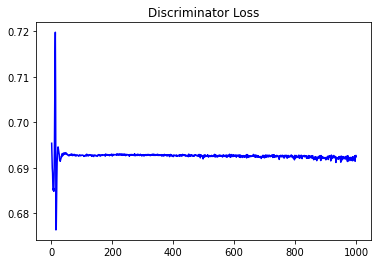

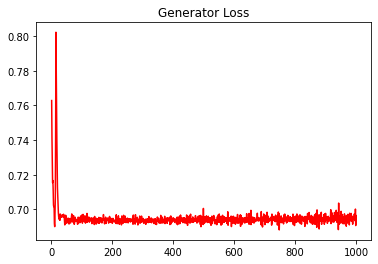

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3175807713837184


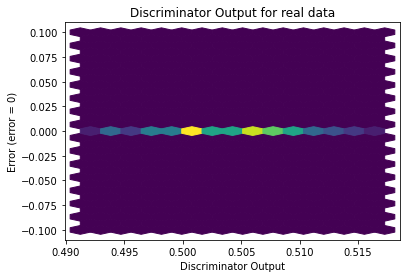

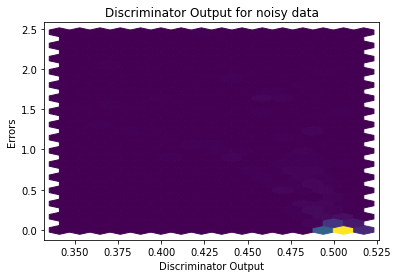

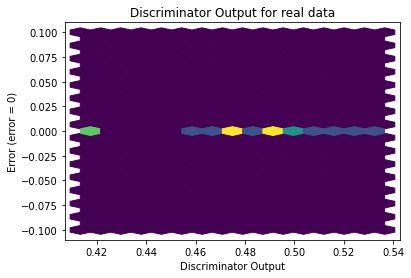

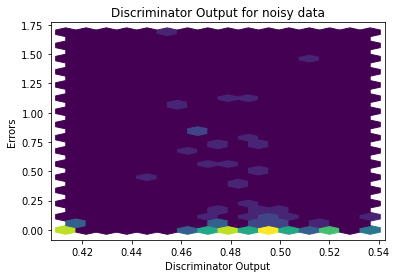

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


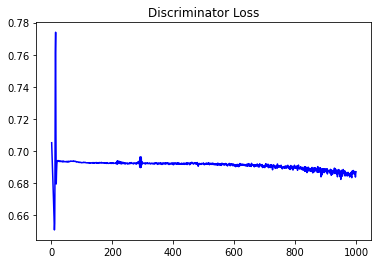

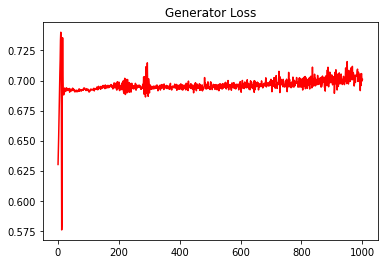

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34921514180649593


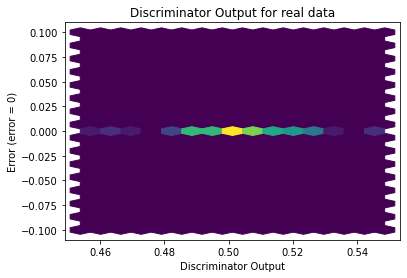

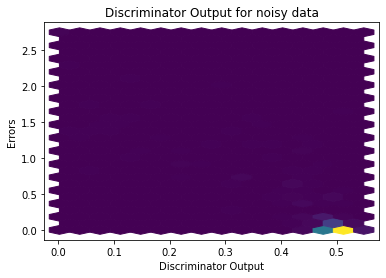

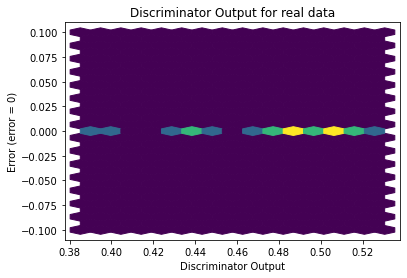

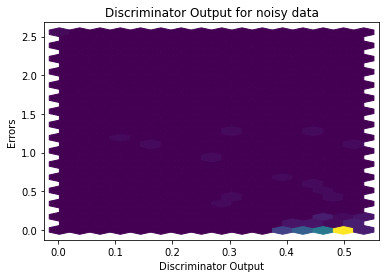

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0824]], requires_grad=True)
